In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Path to the results file you want to analyze
results_path = 'metrics/24-06-2023_10:49:40_hamm_19_l2_24.csv'
df = pd.read_csv(results_path)
df.head()

,Image Path,Success,Queries,Simba L2,Final L2,Final SSIM,Simba Hamming,Final Hamming
0,/Volumes/TempRAM/1.jpeg,0,1831,36.621303,48.852894,0.810072,20,22
1,/Volumes/TempRAM/2.jpeg,1,886,23.779363,23.779363,0.586386,19,19
2,/Volumes/TempRAM/3.jpeg,1,958,43.200874,23.802170,0.931080,17,22
3,/Volumes/TempRAM/4.jpeg,1,3160,57.220738,22.587535,0.926897,18,21
4,/Volumes/TempRAM/5.jpeg,0,2222,49.364104,54.181878,0.767738,23,21


### Average # of Queries

In [3]:
queries = np.array(df['Queries'])
avg_queries = queries.mean()
print(f'The attacks were completed in {int(avg_queries)} queries on average')

The attacks were completed in 1733 queries on average


### Measure the ASR

In [4]:
success = np.array(df['Success'])
ASR = success.mean()
print(f'The attack success rate is: {100*ASR:.2f}%')

The attack success rate is: 57.00%


### Hamming Distance

In [5]:
hamming_dist = np.array(df['Final Hamming'])
avg_hamm = hamming_dist.mean()
print(f'The average hamming distance after joint attack is {avg_hamm}')

The average hamming distance after joint attack is 21.42


### L2 Distortion

In [6]:
simba_l2_dist = np.array(df['Simba L2'])
simba_avg_l2 = simba_l2_dist.mean()
print(f'The average L2 distortion after the soft-label attack is {simba_avg_l2:.4f}')

final_l2_dist = np.array(df['Final L2'])
final_avg_l2 = final_l2_dist.mean()
print(f'The average L2 distortion after the complete attack is {final_avg_l2:.4f}')

The average L2 distortion after the soft-label attack is 40.5764
The average L2 distortion after the complete attack is 30.1817


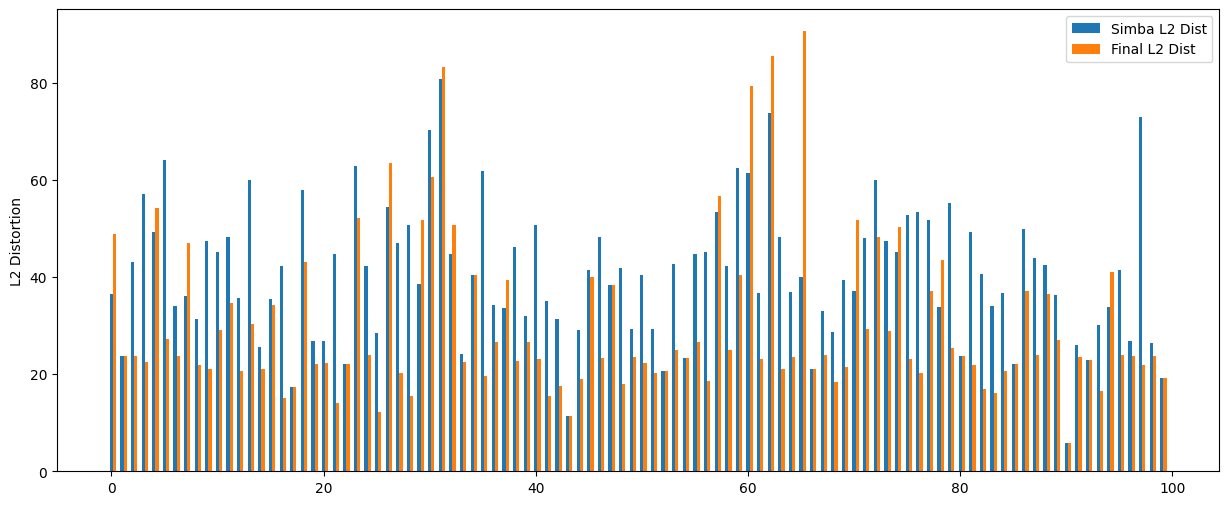

In [7]:
index = np.arange(100)
bar_width = 0.3
fig, ax = plt.subplots(figsize=(15,6)) 
simba_distortion = ax.bar(index, df['Simba L2'], bar_width, label='Simba L2 Dist')
output_distortion = ax.bar(index + bar_width, df['Final L2'], bar_width, label='Final L2 Dist')
ax.set_label('Image')
ax.set_ylabel('L2 Distortion')
ax.legend()

plt.show()